In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, Bidirectional
import matplotlib.pyplot as plt

#### Data preparation:

In [2]:
max_features = 10000  # Dictionary size
maxlen = 500  # Number of words in the review
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17464789/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


#### Creation of models:

In [3]:
# A regular RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

# LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

# Two-sided BRNN
model_brnn = Sequential()
model_brnn.add(Embedding(max_features, 32))
model_brnn.add(Bidirectional(SimpleRNN(32)))
model_brnn.add(Dense(1, activation='sigmoid'))

# Deep DRNN
model_drnn = Sequential()
model_drnn.add(Embedding(max_features, 32))
model_drnn.add(SimpleRNN(32, return_sequences=True))
model_drnn.add(SimpleRNN(32))
model_drnn.add(Dense(1, activation='sigmoid'))

models = [model_rnn, model_lstm, model_brnn, model_drnn]

#### Training models and obtaining accuracy parameters:

In [5]:
histories = []

for i, model in enumerate(models):
    print(f'Training model {i+1}...')
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(input_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2)
    histories.append(history)

Training model 1...
Epoch 1/10
157/157 [==============================] - 89s 549ms/step - loss: 0.6131 - acc: 0.6474 - val_loss: 0.4495 - val_acc: 0.8074
Epoch 2/10
157/157 [==============================] - 83s 530ms/step - loss: 0.3953 - acc: 0.8342 - val_loss: 0.4666 - val_acc: 0.8016
Epoch 3/10
157/157 [==============================] - 81s 516ms/step - loss: 0.3122 - acc: 0.8724 - val_loss: 0.3499 - val_acc: 0.8544
Epoch 4/10
157/157 [==============================] - 77s 494ms/step - loss: 0.2614 - acc: 0.8968 - val_loss: 0.4589 - val_acc: 0.8322
Epoch 5/10
157/157 [==============================] - 80s 510ms/step - loss: 0.2103 - acc: 0.9230 - val_loss: 0.4074 - val_acc: 0.8450
Epoch 6/10
157/157 [==============================] - 75s 480ms/step - loss: 0.1579 - acc: 0.9427 - val_loss: 0.4426 - val_acc: 0.8340
Epoch 7/10
157/157 [==============================] - 76s 477ms/step - loss: 0.1169 - acc: 0.9616 - val_loss: 0.6749 - val_acc: 0.8148
Epoch 8/10
157/157 [===============

#### Output of graphs:

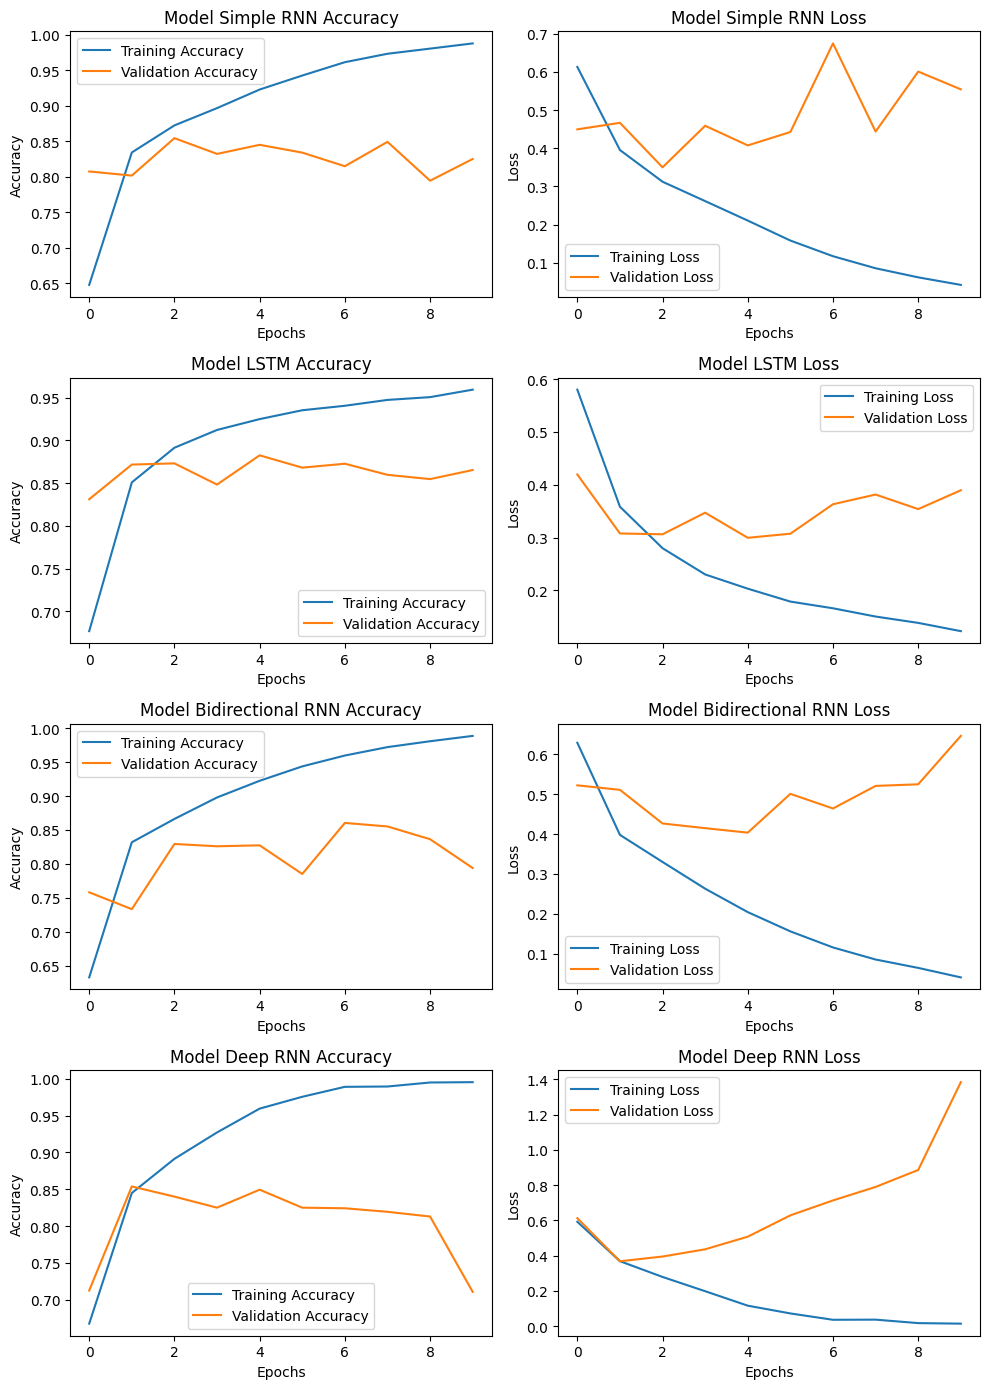

In [28]:
plt.figure(figsize=(10, 14))
model_names = ['Simple RNN', 'LSTM', 'Bidirectional RNN', 'Deep RNN']

for i, history in enumerate(histories):
    plt.subplot(4, 2, 2*i+1)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.title(f'Model {model_names[i]} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(4, 2, 2*i+2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {model_names[i]} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd

# Creating a list for options
model_names = ['Simple RNN', 'LSTM', 'Bidirectional RNN', 'Deep RNN']
train_acc = []
val_acc = []
train_loss = []
val_loss = []

# Collecting results from stories
for history in histories:
    train_acc.append(history.history['acc'][-1])
    val_acc.append(history.history['val_acc'][-1])
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

# Creating a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc,
    'Train Loss': train_loss,
    'Validation Loss': val_loss
})

df.head()

,Model,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,Simple RNN,0.98810,0.8250,0.041694,0.554451
1,LSTM,0.95945,0.8654,0.122965,0.389674
2,Bidirectional RNN,0.98855,0.7940,0.040059,0.646500
3,Deep RNN,0.99525,0.7108,0.014058,1.384891


### Conclusions:

#### In all variants of the models, we observed high accuracy on the training data. This means that the models learn effectively and are able to adapt well to the training data.

#### However, the error on the training data in the LSTM model is many times greater than in the others.

#### On the test data, the LSTM model shows the highest accuracy compared to other variants of the models. This means that it better generalizes knowledge based on new, previously unseen data.

#### It can also be seen that on the training data, the error value increases immediately after the first epoch in almost every model, which indicates very fast retraining (this is especially pronounced in the DRNN model).

#### Therefore, in order to obtain higher quality parameters and an optimal learning process, it is necessary to vary hyperparameters.